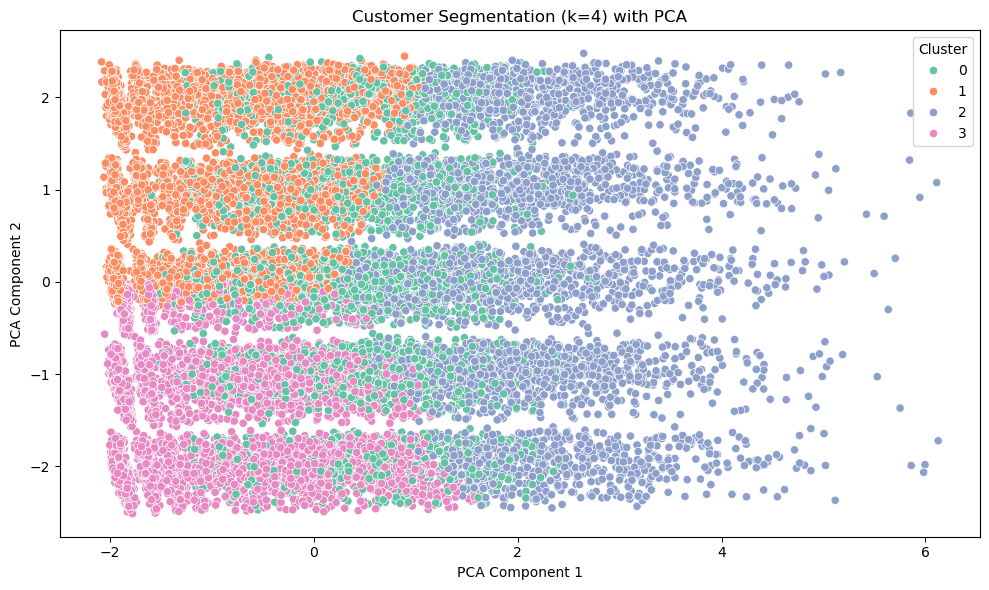

Cluster Profile (k=4):


,age,age group,gender,income/month,account balance,loyalty score,education level,Facebook,Twitter,Email,...,job grouped_retired,job grouped_self employed/entrepreneur,job grouped_student,job grouped_unemployed,job grouped_unknown,job grouped_white collar,marital_married,marital_single,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,45.64,2.10,0.53,9014.71,5057.20,500.67,1.51,0.67,0.67,0.50,...,0.04,0.06,0.00,0.02,0.01,0.41,0.61,0.25,0.38,0.10
1,56.32,3.17,0.50,8927.05,5111.65,494.24,1.51,0.67,0.66,0.50,...,0.04,0.08,0.01,0.03,0.01,0.39,0.73,0.16,-1.06,1.16
2,45.18,2.06,0.49,9112.06,5009.02,494.87,1.51,0.67,0.67,0.47,...,0.04,0.06,0.01,0.02,0.01,0.40,0.64,0.24,2.09,0.07
3,31.02,0.64,0.51,9079.43,5069.59,505.90,1.49,0.67,0.68,0.50,...,0.04,0.07,0.01,0.02,0.01,0.40,0.55,0.32,-0.89,-1.42


In [52]:
# Installing packages 

import pandas as pd 
import os 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset 
df = pd.read_csv("cleaned main dataset.csv",delimiter=",")
df.head()

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (k=4) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Cluster profiling: mean values of features for each cluster
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Display the cluster profile
print("Cluster Profile (k=4):")
cluster_profile

In [54]:
# cluster 1 Value-Driven Frequent Users --> 0 High-Value Power Users
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cleaned = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Run KMeans for the initial segmentation (Update 1)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_initial = kmeans.fit_predict(X_scaled)

# Add initial cluster labels to the DataFrame
df_cleaned['Cluster_Update_1'] = clusters_initial

# Define the fixed customer
fixed_customer = [33]

# Filter for these customers and store their initial cluster assignments
df_fixed_customer = df_cleaned.loc[fixed_customer, ['age', 'income/month', 'loyalty score', 'account balance', 'transaction_count', 'Cluster_Update_1']]

print(df_fixed_customer)

    age  income/month  loyalty score  account balance  transaction_count  \
33   41          3109            788             1418                  2   

    Cluster_Update_1  
33                 1  



Cluster Changes for Selected Customer:
    age  income/month  loyalty score  account balance  transaction_count  \
33   41          3109            788             1418                  2   

    Cluster_Update_1  Cluster_Update_2  
33                 1                 0  


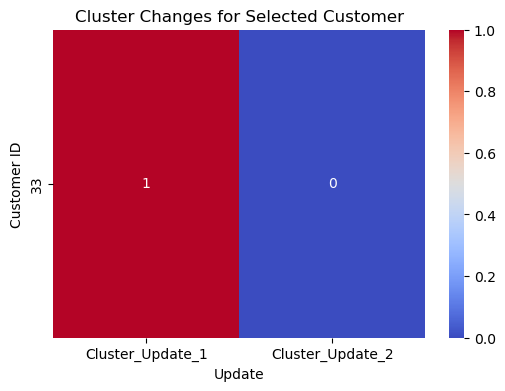

In [56]:
# Force cluster changes for selected customers
df_cleaned.loc[33, ['income/month', 'loyalty score', 'account balance', 'transaction_count']] = [5600, 850, 1700, 6] 
# income raise 3109-->5600, loyalty score: 788--> 850, account balance: 1418 --> 1700, tx: 2 --> 6 
## simulating a pay raise for cm33, increased transactions, withdrawal and deposits.

# Re-standardize after the updates (exclude non-numeric columns such as 'Cluster_Update_1')
X_scaled_updated = scaler.transform(df_cleaned[cluster_features])

# Run KMeans again for the updated segmentation (Update 2)
clusters_updated = kmeans.fit_predict(X_scaled_updated)
df_cleaned['Cluster_Update_2'] = clusters_updated

# Get updated cluster assignments for the same customer
df_fixed_customer['Cluster_Update_2'] = df_cleaned.loc[fixed_customer, 'Cluster_Update_2']

# Show changes in cluster assignments
print("\nCluster Changes for Selected Customer:")
print(df_fixed_customer)

# Visualize changes
plt.figure(figsize=(6, 4))
sns.heatmap(df_fixed_customer[['Cluster_Update_1', 'Cluster_Update_2']], annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Cluster Changes for Selected Customer")
plt.xlabel("Update")
plt.ylabel("Customer ID")
plt.show()
